# CAPSTON PROJECT

---



## STEP 1: LOAD and IMPORT LIBRARIES

---



In [1]:
import string
import psycopg2
import getpass
import pandas as pd
import numpy as np

## STEP 2: IMPORT DATA

---



In [2]:
# Request user for password to access database
db_password = getpass.getpass(prompt='DB Password ')

# Create SQL engine with connection parameters to connect to AWS RDS Postgres instance
engine = psycopg2.connect(
    database="Capstone_Project_Group_9",
    user="postgres",
    password=db_password,
    host="capstone-project-group-9.c4857qrbkptn.us-east-2.rds.amazonaws.com",
    port='5432'
)

# Show sample of the imported data
dataset_df = pd.read_sql('SELECT * FROM fake_job_postings', engine)
dataset_df.head(1)

DB Password ········


job_id             title          location department salary_range  \
0       1  Marketing Intern  US; NY; New York  Marketing         None   

                                     company_profile  \
0  We're Food52 and we've created a groundbreakin...   

                                         description  \
0  Food52 a fast-growing James Beard Award-winnin...   

                                        requirements benefits  telecommuting  \
0  Experience with content management systems a m...     None              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   

  required_education industry   function  fraudulent  
0               None     None  Marketing           0

In [3]:
# Drop columns with too many null values or where all values are unique
dataset_df = dataset_df.drop(columns=['job_id','salary_range','title'])

In [4]:
# Display number of null values for each column
dataset_df.isnull().sum()

location                 346
department             11547
company_profile         3308
description                0
requirements            2694
benefits                7206
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
# Split the location columns by the seperator and only keep the country
# Only country is kept due to misspelled states and cities and some rows have multiple states and cities
# that do not have a seperator
dataset_df['Country'] = dataset_df['location'].str.split(';').str[0]
dataset_df = dataset_df.drop(columns=['location'])
dataset_df.head(1)

department                                    company_profile  \
0  Marketing  We're Food52 and we've created a groundbreakin...   

                                         description  \
0  Food52 a fast-growing James Beard Award-winnin...   

                                        requirements benefits  telecommuting  \
0  Experience with content management systems a m...     None              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   

  required_education industry   function  fraudulent Country  
0               None     None  Marketing           0      US

In [6]:
# Replace null values with "not specified" string
dataset_df = dataset_df.fillna('not specified')
dataset_df.head(1)

department                                    company_profile  \
0  Marketing  We're Food52 and we've created a groundbreakin...   

                                         description  \
0  Food52 a fast-growing James Beard Award-winnin...   

                                        requirements       benefits  \
0  Experience with content management systems a m...  not specified   

   telecommuting  has_company_logo  has_questions employment_type  \
0              0                 1              0           Other   

  required_experience required_education       industry   function  \
0          Internship      not specified  not specified  Marketing   

   fraudulent Country  
0           0      US

In [7]:
# Define columns that need to be cleaned
clean_cols = ["company_profile", "description", "requirements", "benefits"]
# Loop through clean_cols and remove punctuation and characters
for col in clean_cols:
    dataset_df[col] = dataset_df[col].replace(r'[^a-zA-Z0-9\s]', '',regex=True)
    dataset_df[col] = dataset_df[col].replace(r'\s{2,}', '',regex=True)

dataset_df.head(1)

department                                    company_profile  \
0  Marketing  Were Food52 and weve created a groundbreaking ...   

                                         description  \
0  Food52 a fastgrowing James Beard Awardwinning ...   

                                        requirements       benefits  \
0  Experience with content management systems a m...  not specified   

   telecommuting  has_company_logo  has_questions employment_type  \
0              0                 1              0           Other   

  required_experience required_education       industry   function  \
0          Internship      not specified  not specified  Marketing   

   fraudulent Country  
0           0      US

In [8]:
# check the number of null values in columns
dataset_df.isnull().sum()

department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
Country                0
dtype: int64

In [9]:
# Remove any whitespace from the country, city and state columns
### code is kept for future compatibility ###
#dataset_df['Country'] = dataset_df['Country'].map(lambda x: x.strip())

#dataset_df.head()

In [10]:
# make all text lower case
string_cols = list(dataset_df.select_dtypes(include='object'))
for col in string_cols:
    dataset_df[col] = dataset_df[col].str.lower()

#dataset_df.head()

In [11]:
# Get number of unique values in each column
dataset_df.nunique()

department              1284
company_profile         1710
description            14727
requirements           11911
benefits                6022
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
Country                   91
dtype: int64

## Step 3: Feature encoding

---



In [12]:
# Import libraries required for encoding
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

In [13]:
# Define Ordinal and Nominal columns
nom_cols = ['department', 'industry', 'function', 'Country']
ord_cols = ['employment_type','required_experience','required_education']

In [14]:
# Run TargetEncoder on nominal columns
Targetenc = TargetEncoder()
for col in nom_cols:
    values = Targetenc.fit_transform(X = dataset_df[col], y = dataset_df['fraudulent'])
    dataset_df[col] = values[col]

dataset_df.head(2)

C:\Users\Khashayar\anaconda3\envs\mlenv\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\Users\Khashayar\anaconda3\envs\mlenv\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


department                                    company_profile  \
0    0.004963  were food52 and weve created a groundbreaking ...   
1    0.000871  90 seconds the worlds cloud video production s...   

                                         description  \
0  food52 a fastgrowing james beard awardwinning ...   
1  organisedfocusedvibrantawesomedo you have a pa...   

                                        requirements  \
0  experience with content management systems a m...   
1  what we expect from youyour key responsibility...   

                                            benefits  telecommuting  \
0                                      not specified              0   
1  what you will get from usthrough being part of...              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           other          internship   
1                 1              0       full-time      not applicable   

  required_education  industry  function  fraudulent   Country  
0      not specified  0.056088  0.012048           0  0.068506  
1      not specified  0.054348  0.054516           0  0.000000

In [15]:
# Run labelEncoder on Ordinal columns
le = LabelEncoder()
for col in ord_cols:
    dataset_df[col] = le.fit_transform(dataset_df[col])

In [16]:
# rename all columns to have data_ prefix for easy feature identification in machine learning model
for col in dataset_df.columns:
    dataset_df.rename(columns = {col:f'data_{col}'}, inplace = True)
    
# update clean_cols to have new column names    
clean_cols = ["data_company_profile", "data_description", "data_requirements", "data_benefits"]

In [17]:
dataset_df.head(1)

data_department                               data_company_profile  \
0         0.004963  were food52 and weve created a groundbreaking ...   

                                    data_description  \
0  food52 a fastgrowing james beard awardwinning ...   

                                   data_requirements  data_benefits  \
0  experience with content management systems a m...  not specified   

   data_telecommuting  data_has_company_logo  data_has_questions  \
0                   0                      1                   0   

   data_employment_type  data_required_experience  data_required_education  \
0                     3                         4                        6   

   data_industry  data_function  data_fraudulent  data_Country  
0       0.056088       0.012048                0      0.068506

In [18]:
dataset_df.dtypes

data_department             float64
data_company_profile         object
data_description             object
data_requirements            object
data_benefits                object
data_telecommuting            int64
data_has_company_logo         int64
data_has_questions            int64
data_employment_type          int32
data_required_experience      int32
data_required_education       int32
data_industry               float64
data_function               float64
data_fraudulent               int64
data_Country                float64
dtype: object

## Step 4: Tockenizing

---



### NLTK 

In [19]:
# Import libraries for NLTK and sklearn
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Khashayar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# create stopwords
stop = stopwords.words('english')

In [21]:
# for each column in clean_cols remove stopwords
for col in clean_cols:
  dataset_df[col] = dataset_df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
# Run Stemming on clean_cols
porter = PorterStemmer()

for col in clean_cols:
  dataset_df[col] = dataset_df[col].apply(porter.stem)

In [23]:
# Combine all columns in clean_cols into single text column and create new column witi length of text
dataset_df['combined_text'] = dataset_df['data_company_profile'] + dataset_df['data_description'] + dataset_df['data_requirements'] + dataset_df['data_benefits']
#dataset_df['combined_text_length'] = dataset_df['combined_text'].str.len()

# Create list of columns for vectorization
num_cols = list(dataset_df.select_dtypes(include=['int64','float64']))
num_cols.append('combined_text')

### View Resulting Output from NLTK

In [24]:
dataset_df.head(2)

data_department                               data_company_profile  \
0         0.004963  food52 weve created groundbreaking awardwinnin...   
1         0.000871  90 seconds worlds cloud video production servi...   

                                    data_description  \
0  food52 fastgrowing james beard awardwinning on...   
1  organisedfocusedvibrantawesomedo passion custo...   

                                   data_requirements  \
0  experience content management systems major pl...   
1  expect youyour key responsibility communicate ...   

                                       data_benefits  data_telecommuting  \
0                                            specifi                   0   
1  get usthrough part 90 seconds team gainexperie...                   0   

   data_has_company_logo  data_has_questions  data_employment_type  \
0                      1                   0                     3   
1                      1                   0                     1   

   data_required_experience  data_required_education  data_industry  \
0                         4                        6       0.056088   
1                         6                        6       0.054348   

   data_function  data_fraudulent  data_Country  \
0       0.012048                0      0.068506   
1       0.054516                0      0.000000   

                                       combined_text  
0  food52 weve created groundbreaking awardwinnin...  
1  90 seconds worlds cloud video production servi...

In [25]:
# Create dataframe with only required columns for vectorization
vector_df = dataset_df[num_cols]

In [26]:
vector_df.head(1)

data_department  data_telecommuting  data_has_company_logo  \
0         0.004963                   0                      1   

   data_has_questions  data_industry  data_function  data_fraudulent  \
0                   0       0.056088       0.012048                0   

   data_Country                                      combined_text  
0      0.068506  food52 weve created groundbreaking awardwinnin...

In [27]:
# Create Term freqeuncy Vectorizer
tfidf_vect = TfidfVectorizer(use_idf=True,
                      smooth_idf=True,
                      min_df = 1,
                      stop_words = 'english',
                      max_features = 1000)

In [28]:
# Run term frequency vectorizor
term_freq_idf_df = pd.DataFrame(tfidf_vect.fit_transform(vector_df['combined_text']).toarray(), columns=tfidf_vect.get_feature_names_out())

In [29]:
term_freq_idf_df.head(2)

10      100   12   20  200        30  401k        50        90  ability  \
0  0.0  0.00000  0.0  0.0  0.0  0.000000   0.0  0.000000  0.000000      0.0   
1  0.0  0.05194  0.0  0.0  0.0  0.051452   0.0  0.057302  0.255256      0.0   

   ...  worldwide  write  writing  written  year  years      york  youll  \
0  ...        0.0    0.0      0.0      0.0   0.0    0.0  0.269674    0.0   
1  ...        0.0    0.0      0.0      0.0   0.0    0.0  0.000000    0.0   

   young  youre  
0    0.0    0.0  
1    0.0    0.0  

[2 rows x 1000 columns]

### Create DF ready for Machine Learning

In [30]:
# Merge vector_df with term frequency vectorizor output
ml_df = vector_df.merge(term_freq_idf_df, left_index=True, right_index=True, how='inner')

In [31]:
# drop the original text column
ml_df.drop('combined_text',axis=1,inplace=True)

In [32]:
ml_df.head(2)

data_department  data_telecommuting  data_has_company_logo  \
0         0.004963                   0                      1   
1         0.000871                   0                      1   

   data_has_questions  data_industry  data_function  data_fraudulent  \
0                   0       0.056088       0.012048                0   
1                   0       0.054348       0.054516                0   

   data_Country   10      100  ...  worldwide  write  writing  written  year  \
0      0.068506  0.0  0.00000  ...        0.0    0.0      0.0      0.0   0.0   
1      0.000000  0.0  0.05194  ...        0.0    0.0      0.0      0.0   0.0   

   years      york  youll  young  youre  
0    0.0  0.269674    0.0    0.0    0.0  
1    0.0  0.000000    0.0    0.0    0.0  

[2 rows x 1008 columns]

## Step 5: Machine Learning
ml_df is the dataframe ready for machine learning
---

In [33]:
# Selecting our feature and target variables
from sklearn.model_selection import train_test_split
x = ml_df.drop('data_fraudulent',axis=1)
y = ml_df.data_fraudulent

# splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1,stratify=y)

In [34]:
# Importing required libraries for LightGBM model
import lightgbm as lgb
from sklearn import metrics
from datetime import datetime

In [35]:
#setting up the parameters for our LightGBM model and training our model
model_lightgbm = lgb.LGBMClassifier(num_iteration=250,learning_rate=0.08,max_depth=7,random_state=1,bagging_fraction=0.9)
lgb_start = datetime.now()
model_lightgbm.fit(x_train,y_train, eval_set=[(x_test,y_test),(x_train ,y_train)], verbose=50, eval_metric='logloss')
lgb_stop = datetime.now()

C:\Users\Khashayar\anaconda3\envs\mlenv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Khashayar\anaconda3\envs\mlenv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] num_iterations is set=250, num_iteration=250 will be ignored. Current value: num_iterations=250
[50]	training's binary_logloss: 0.0332715	valid_0's binary_logloss: 0.0610537
[100]	training's binary_logloss: 0.0190266	valid_0's binary_logloss: 0.0516277
[150]	training's binary_logloss: 0.012428	valid_0's binary_logloss: 0.0486777
[200]	training's binary_logloss: 0.00837389	valid_0's binary_logloss: 0.0466444
[250]	training's binary_logloss: 0.00578817	valid_0's binary_logloss: 0.0464232


In [36]:
#Execution time of the LightGBM model 
execution_time_lgb = lgb_stop - lgb_start

In [37]:
# printing the accuracy of the model during training
print('Training accuracy of the lightgbm model is  {:.4f}'.format(model_lightgbm.score(x_train,y_train)))

Training accuracy of the lightgbm model is  0.9996


In [38]:
# printing the accuracy of the model during Testing
print('Testing accuracy of the lightgbm model is  {:.4f}'.format(model_lightgbm.score(x_test,y_test)))

Testing accuracy of the lightgbm model is  0.9838


In [39]:
# calculating accuracy of our model 
accuracy_lgb = model_lightgbm.score(x_test,y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

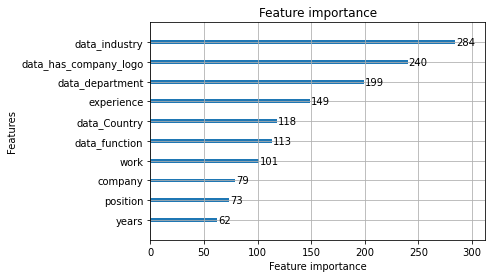

In [40]:
# Plotting the important features
lgb.plot_importance(model_lightgbm, max_num_features=10)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

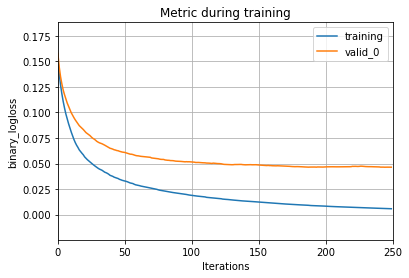

In [41]:
# Graphing the learning curve for LightGBM model
lgb.plot_metric(model_lightgbm)

In [42]:
# Classification report for Training LightGBM
print(metrics.classification_report(y_train,model_lightgbm.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15313
           1       1.00      0.99      1.00       779

    accuracy                           1.00     16092
   macro avg       1.00      1.00      1.00     16092
weighted avg       1.00      1.00      1.00     16092



In [43]:
# Classification report for Testing LightGBM
print(metrics.classification_report(y_test,model_lightgbm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1701
           1       0.93      0.72      0.81        87

    accuracy                           0.98      1788
   macro avg       0.96      0.86      0.90      1788
weighted avg       0.98      0.98      0.98      1788



In [44]:
# Splitting Training classification report into its components for LightGBM
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_train,model_lightgbm.predict(x_train))
print ('Precision : {}'.format(precision))
print ('Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

Precision : [0.99960833 1.        ]
Recall    : [1.         0.99229782]
F-score   : [0.99980413 0.99613402]
Support   : [15313   779]


In [45]:
# Splitting Testing classification report into its components for LightGBM
precision,recall,fscore,support=score(y_test,model_lightgbm.predict(x_test))
lgb_recall = score(y_test,model_lightgbm.predict(x_test))[1]
lgb_recall_0 = lgb_recall[0]
lgb_recall_1 = lgb_recall[1]

C:\Users\Khashayar\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


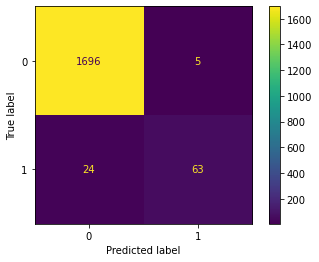

In [46]:
# Plotting confusion matrix for LightGBM model
metrics.plot_confusion_matrix(model_lightgbm,x_test,y_test)

In [47]:
# Importing required libraries for XGBoost model
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [48]:
#setting up the parameters for our XGBoost model and training our model
model_xgboost = xgb.XGBClassifier(n_estimators = 100, objective='binary:logistic', missing=1, seed= 42, random_state=1)
xgb_start = datetime.now()
model_xgboost.fit(x_train, y_train, eval_set=[(x_test,y_test),(x_train,y_train)], verbose=50, eval_metric='logloss')
xgb_stop=datetime.now()

C:\Users\Khashayar\anaconda3\envs\mlenv\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-logloss:0.46259	validation_1-logloss:0.46060
[50]	validation_0-logloss:0.04972	validation_1-logloss:0.01519
[99]	validation_0-logloss:0.04781	validation_1-logloss:0.00706


In [49]:
# Execution time of the XGBoost model 
execution_time_xgb = xgb_stop - xgb_start 

In [50]:
# calculating accuracy of XGBoost model 
accuracy_xgb = model_xgboost.score(x_test,y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

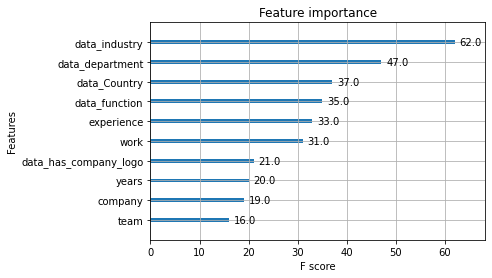

In [51]:
# Plotting the important features for XGBoost model
xgb.plot_importance(model_xgboost, max_num_features=10)

In [52]:
results = model_xgboost.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

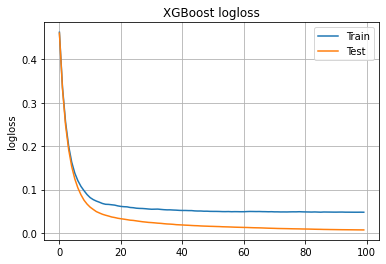

In [53]:
# Plotting the learning curve for XGBoost model
from matplotlib import pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('logloss')
pyplot.title('XGBoost logloss')
pyplot.grid()
pyplot.show()

C:\Users\Khashayar\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


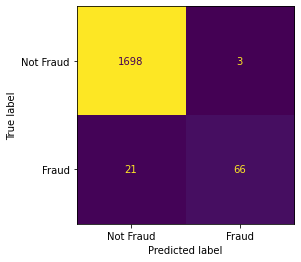

In [54]:
# Plotting the confusion matrix for XGBoost model
plot_confusion_matrix(model_xgboost, 
                      x_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Not Fraud','Fraud'],
                      colorbar = False)

In [55]:
# Classification report for Training XGBoost
print(metrics.classification_report(y_train,model_xgboost.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15313
           1       1.00      0.99      0.99       779

    accuracy                           1.00     16092
   macro avg       1.00      0.99      1.00     16092
weighted avg       1.00      1.00      1.00     16092



In [56]:
# Classification report for Testing XGBoost
print(metrics.classification_report(y_test,model_xgboost.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1701
           1       0.96      0.76      0.85        87

    accuracy                           0.99      1788
   macro avg       0.97      0.88      0.92      1788
weighted avg       0.99      0.99      0.99      1788



In [57]:
# Splitting Training classification report into its components for XGBoost
precision,recall,fscore,support= score(y_train,model_xgboost.predict(x_train))
print ('Precision : {}'.format(precision))
print ('Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

Precision : [0.99934739 1.        ]
Recall    : [1.         0.98716303]
F-score   : [0.99967359 0.99354005]
Support   : [15313   779]


In [58]:
# Splitting Testing classification report into its components for XGBoost
precision,recall,fscore,support= score(y_test,model_xgboost.predict(x_test))
xgb_recall = score(y_test,model_xgboost.predict(x_test))[1]
xgb_recall_0 = xgb_recall[0]
xgb_recall_1 = xgb_recall[1]

In [59]:
# Creating comparison dictionary
comparison_dict = {'accuracy score':(accuracy_lgb,accuracy_xgb),'Recall 0':(lgb_recall_0, xgb_recall_0),'Recall 1':(lgb_recall_1, xgb_recall_1), 'execution time':(execution_time_lgb, execution_time_xgb)}

# Creating a dataframe ‘comparison_df’ for comparing the performance of Lightgbm and xgb. 
comparison_df = pd.DataFrame(comparison_dict) 
comparison_df.index= ['LightGBM','XGBoost'] 
comparison_df

accuracy score  Recall 0  Recall 1         execution time
LightGBM        0.983781  0.997061  0.724138 0 days 00:00:21.259455
XGBoost         0.986577  0.998236  0.758621 0 days 00:00:38.851089